In [2]:
# Build image classifier for dino-dragon dataset

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

2022-11-26 08:50:04.831917: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# load data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
train_generator = train_datagen.flow_from_directory(
                                                    'data/dino-dragon/train/',
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    subset='training'
                                                    )
validation_generator = train_datagen.flow_from_directory(
                                                    'data/dino-dragon/train/',
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    subset='validation'
                                                    )

# build model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=0.0001),
                metrics=['accuracy'])

steps_per_epoch = train_generator.n // train_generator.batch_size

# train model
history = model.fit(
                    train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // validation_generator.batch_size,
                    callbacks=[
                                EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
                                ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.1)
                                ]
                    )


Found 1436 images belonging to 2 classes.
Found 158 images belonging to 2 classes.
Epoch 1/10
44/44 [==============================] - 22s 475ms/step - loss: 0.6268 - accuracy: 0.6517 - val_loss: 0.4667 - val_accuracy: 0.8203 - lr: 1.0000e-04
Epoch 2/10
44/44 [==============================] - 21s 470ms/step - loss: 0.4821 - accuracy: 0.7707 - val_loss: 0.3457 - val_accuracy: 0.8828 - lr: 1.0000e-04
Epoch 3/10
44/44 [==============================] - 21s 464ms/step - loss: 0.3481 - accuracy: 0.8675 - val_loss: 0.2352 - val_accuracy: 0.9062 - lr: 1.0000e-04
Epoch 4/10
44/44 [==============================] - 21s 469ms/step - loss: 0.2698 - accuracy: 0.9038 - val_loss: 0.2248 - val_accuracy: 0.8984 - lr: 1.0000e-04
Epoch 5/10
44/44 [==============================] - 21s 464ms/step - loss: 0.2380 - accuracy: 0.9145 - val_loss: 0.2638 - val_accuracy: 0.8984 - lr: 1.0000e-04
Epoch 6/10
44/44 [==============================] - 21s 479ms/step - loss: 0.2803 - accuracy: 0.8839 - val_loss: 0.21

In [13]:
# evaluate model
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                                                'data/dino-dragon/test/',  
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='binary'
                                                )

test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('test_acc:', test_acc)


Found 394 images belonging to 2 classes.
13/13 - 2s - loss: 0.1779 - accuracy: 0.9340 - 2s/epoch - 163ms/step
test_acc: 0.9340101480484009


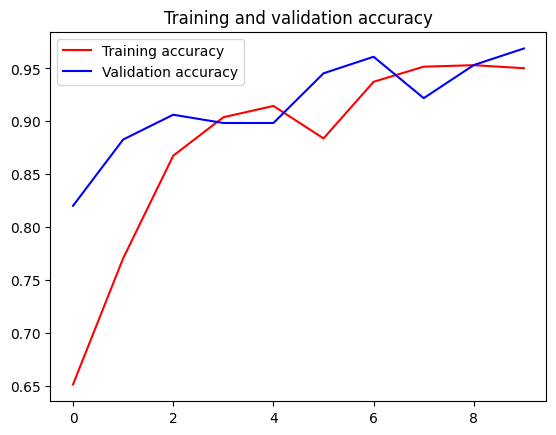

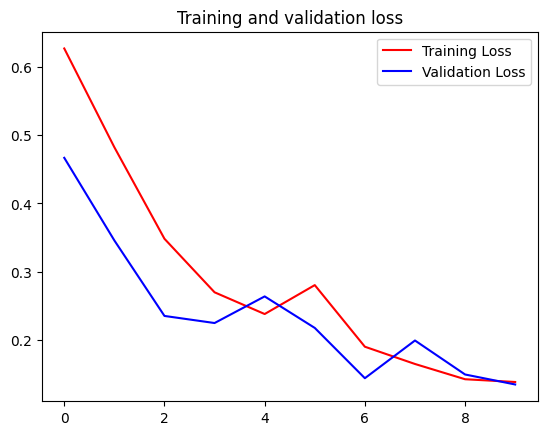

<Figure size 640x480 with 0 Axes>

In [14]:
# plot accuracy and loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    plt.figure()

    plt.show()

plot_history(history)

In [29]:
# save model
model.save('models/base-dino-dragon.h5')

In [28]:

# predict
from tensorflow.keras.preprocessing import image
import numpy as np

image_path = '/Users/mahesh.sinha/Desktop/personal/Repos/machine-learning/mlzoomcamp-2022/week-8/data/dino-dragon/test/dino/3d38ec25-2358-4b06-9ee0-fc1a23d30217.jpg'

# load image
img = image.load_img(image_path, target_size=(150, 150))

# convert image to array
x = image.img_to_array(img)

print(x.shape)

# add a dimension to array
x = np.expand_dims(x, axis=0)

print(x.shape)

# predict probability
preds = model.predict(x)

# print prediction probability
print(preds)

(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 34ms/step
[[0.]]


In [23]:
# Streamlit app

# install streamlit
# pip install streamlit 

# run streamlit app
#pytho


0


In [30]:
# class labels
print(train_generator.class_indices)

{'dino': 0, 'dragon': 1}
